In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

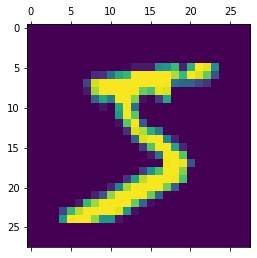

In [9]:
plt.matshow(X_train[0])

In [29]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 996us/step - loss: 16.0625 - accuracy: 0.7743
Epoch 2/5
1875/1875 [==============================] - 2s 979us/step - loss: 6.1438 - accuracy: 0.8757
Epoch 3/5
1875/1875 [==============================] - 2s 992us/step - loss: 5.5198 - accuracy: 0.8846
Epoch 4/5
1875/1875 [==============================] - 2s 977us/step - loss: 5.3408 - accuracy: 0.8868
Epoch 5/5
1875/1875 [==============================] - 2s 981us/step - loss: 5.2239 - accuracy: 0.8875


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 799us/step - loss: 6.1686 - accuracy: 0.8768


[6.168576240539551, 0.876800000667572]

In [15]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([4.6014069e-25, 0.0000000e+00, 9.7730563e-29, 1.0000000e+00,
       1.9698986e-38, 9.9998271e-01, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

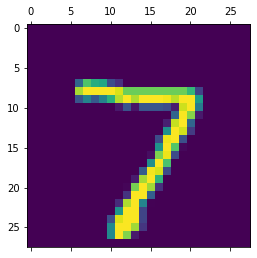

In [21]:
plt.matshow(X_test[0])

In [22]:
np.argmax(y_predicted[0])

3

### Normalize the data

In [30]:
X_train_flattened = X_train_flattened / 255
X_test_flattened = X_test_flattened / 255

In [31]:
X_train_flattened.shape

(60000, 784)

In [32]:
y_train.shape

(60000,)

In [33]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 937us/step - loss: 0.7178 - accuracy: 0.8136
Epoch 2/5
1875/1875 [==============================] - 2s 912us/step - loss: 0.3094 - accuracy: 0.9143
Epoch 3/5
1875/1875 [==============================] - 2s 923us/step - loss: 0.2820 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 2s 940us/step - loss: 0.2706 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 2s 939us/step - loss: 0.2658 - accuracy: 0.9263


In [34]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 758us/step - loss: 0.2680 - accuracy: 0.9247


[0.26802384853363037, 0.9247000217437744]

In [36]:
y_predicted = model.predict(X_test_flattened)
np.argmax(y_predicted[0])

7

### Confusion Matrix

In [37]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [38]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [39]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    0,    2,    0,    5,    8,    2,    1,    0],
       [   0, 1112,    2,    2,    0,    1,    4,    2,   12,    0],
       [   7,    9,  913,   23,    7,    3,   13,   10,   43,    4],
       [   2,    0,   14,  934,    1,   17,    3,    8,   21,   10],
       [   1,    1,    2,    1,  906,    0,   15,    4,   10,   42],
       [  10,    2,    2,   46,    9,  754,   21,    4,   37,    7],
       [   8,    3,    6,    1,    7,    7,  922,    2,    2,    0],
       [   1,    5,   21,    8,    8,    1,    0,  945,    4,   35],
       [   7,    6,    6,   25,    8,   21,   11,   11,  872,    7],
       [  11,    7,    1,   12,   25,    4,    0,   16,    6,  927]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

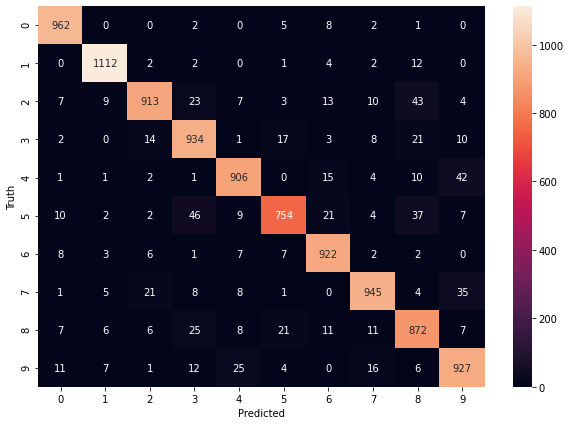

In [40]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Introducing hidden layer

In [42]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4640 - accuracy: 0.8680
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1279 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0849 - accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0604 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0468 - accuracy: 0.9863


In [43]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0738 - accuracy: 0.9763


[0.07378767430782318, 0.9763000011444092]

Text(69.0, 0.5, 'Truth')

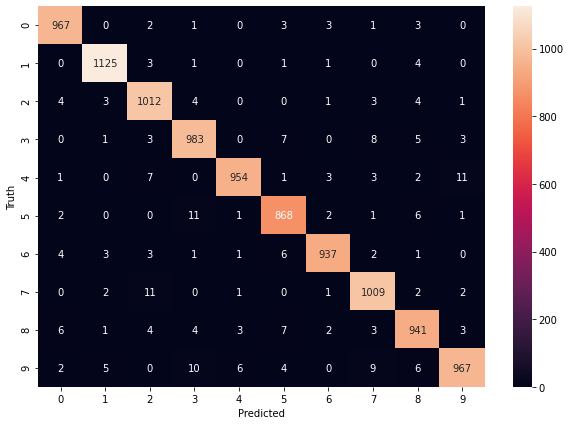

In [44]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using Flatten layer so that we don't have to call .reshape on input dataset

In [48]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 3s 1ms/step - loss: 7.0780 - accuracy: 0.8068
Epoch 2/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4535 - accuracy: 0.8909
Epoch 3/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3054 - accuracy: 0.9215
Epoch 4/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2521 - accuracy: 0.9367
Epoch 5/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2209 - accuracy: 0.9432
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2055 - accuracy: 0.9465
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1953 - accuracy: 0.9510
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1897 - accuracy: 0.9539
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1721 - accuracy: 0.9561
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.170

In [49]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3593 - accuracy: 0.9470


[0.35934117436408997, 0.9470000267028809]